## Title: Mapping and Sentiment Analysis of Geospatial Data

Task 1.1: Application of Python-based geospatial visualisation tool (e.g., GeoPandas) on a realworld dataset

In this task I shall use the dataset, Total Greenhouse Gas Emission dataset obtained from the World Bank.
I shall use a Python-based visualisation tool (such as GeoPandas) to plot a set of choropleth maps representing the world
greenhouse gas emission for the years 2000 and 2010 respectively. In this Jupyter notebook (.ipynb), the following operations would be performed:
1. import Libraries
2. import the datasets using Python library 
3. data cleaning
4. geospatial operations and 
5. generate and ploting using Python tool GeoPandas to visualize the choropleths of the dataset

All the functions, libraries and coding steps would be explained in a lucid manner

# Data Preprocessing

### Acquire the dataset

### Import Libraries

In [2]:
#Libraries here
import pandas as pd 
import numpy as np
import missingno

#Visualization libraries
#import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt
#import plotly.express as px
from matplotlib import patheffects
import geopandas as gpd
from geotext import GeoText
import seaborn as sns
#import itertools
#import collections



import nltk
stopwords = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize
import re
import networkx
from textblob import TextBlob


import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

### Importing Dataset: Total Greenhouse Gas Emission Dataset

In [3]:
#Importing Data API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv
df=pd.read_csv(r"C:\Users\USER\Desktop\geospatial dataset\API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv",skiprows=4)

In [4]:
#Display the dataset
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,41657.164846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Display the dimension of the Dataset

In [5]:
# Viewing the dimensions of the Data (API_EN.ATM.GHGT.KT.CE_DS2_en_csv_v2_1865570.csv)
print(f'The Data-Set contains {df.shape[0]} Rows and {df.shape[1]} Columns')

The Data-Set contains 264 Rows and 66 Columns


In [6]:
#Display the datatype of the dataset 
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2017              float64
2018              float64
2019              float64
2020              float64
Unnamed: 65       float64
Length: 66, dtype: object

### Checking for duplicate 

In [7]:
df.duplicated().sum()

0

# Checking missing values

In [8]:
#Find missing values of the data set
df.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
260,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
261,False,False,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
262,False,False,False,False,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True


### Summing the missing values

In [9]:
#Summation of the missing values
df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2017              264
2018              264
2019              264
2020              264
Unnamed: 65       264
Length: 66, dtype: int64

In [10]:
#Check the sum of missing value
df.isna().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              264
                 ... 
2017              264
2018              264
2019              264
2020              264
Unnamed: 65       264
Length: 66, dtype: int64

In [11]:
#Column information
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Unnamed: 65'],
      dtype='object')

### Drop columns 

In [12]:
#Drop columns that are not relevant to this analysis to minimize the views

drop_columns = [
    'Indicator Name', 'Indicator Code','1960', '1961', '1962', '1963', '1964', 
    '1965', '1966', '1967', '1968','1969', '1970', '1971', '1972', '1973', 
    '1974', '1975', '1976', '1977','1978', '1979', '1980', '1981', '1982', 
    '1983', '1984', '1985', '1986','1987', '1988', '1989', '1990', '1991', 
    '1992', '1993', '1994', '1995','1996', '1997', '1998', '1999','2011', 
    '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019', '2020'
]

df.drop(columns=drop_columns, inplace=True)
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,13530.9530,12585.4020,13842.73810,14709.8840,14654.37400,14770.2643,14849.15940,15272.6330,15288.7756,15554.429500,17791.329902,NaN
2,Angola,AGO,34780.6811,34371.8411,34490.36900,35858.0150,36860.23340,35855.7384,36375.82200,36690.5340,37396.2940,38309.465126,40029.392101,NaN
3,Albania,ALB,8389.2767,6820.6244,7503.05976,7834.0157,7401.10155,8308.3856,8027.14955,9879.3935,8136.7850,8108.812387,8506.996034,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filling of missing values of the dataset

In [13]:
#Calculate the Mean values for missed value
df["2000"] = df["2000"].replace(np.NaN, df["2000"].mean())
df["2001"] = df["2001"].replace(np.NaN, df["2001"].mean())
df["2002"] = df["2002"].replace(np.NaN, df["2002"].mean())
df["2003"] = df["2003"].replace(np.NaN, df["2003"].mean())
df["2004"] = df["2004"].replace(np.NaN, df["2004"].mean())
df["2005"] = df["2005"].replace(np.NaN, df["2005"].mean())
df["2006"] = df["2006"].replace(np.NaN, df["2006"].mean())
df["2007"] = df["2007"].replace(np.NaN, df["2007"].mean())
df["2008"] = df["2008"].replace(np.NaN, df["2008"].mean())
df["2009"] = df["2009"].replace(np.NaN, df["2009"].mean())
df["2010"] = df["2010"].replace(np.NaN, df["2010"].mean())

In [14]:
#dsiplay dataset
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
0,Aruba,ABW,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN
1,Afghanistan,AFG,1.353095e+04,1.258540e+04,1.384274e+04,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,NaN
2,Angola,AGO,3.478068e+04,3.437184e+04,3.449037e+04,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,NaN
3,Albania,ALB,8.389277e+03,6.820624e+03,7.503060e+03,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,NaN
4,Andorra,AND,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN


In [15]:
#Check the sum of missing value
df.isna().sum()

Country Name      0
Country Code      0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
Unnamed: 65     264
dtype: int64

In [16]:
df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,0.0
mean,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN
std,4.259798e+06,4.248278e+06,4.588605e+06,4.750427e+06,4.891087e+06,5.114451e+06,5.333407e+06,5.473905e+06,5.279294e+06,5.265887e+06,5.612164e+06,NaN
min,4.896875e+00,4.907344e+00,5.034354e+00,5.041195e+00,5.039763e+00,5.042693e+00,5.045092e+00,5.052994e+00,5.062560e+00,5.068208e+00,5.109678e+00,NaN
25%,1.753302e+04,1.786946e+04,1.968392e+04,2.008290e+04,1.941667e+04,2.111004e+04,2.237338e+04,2.080194e+04,2.399052e+04,2.420076e+04,2.649470e+04,NaN
50%,1.027567e+05,1.042568e+05,1.129328e+05,1.133808e+05,1.005445e+05,1.242413e+05,1.257671e+05,1.309508e+05,1.296503e+05,1.253792e+05,1.418682e+05,NaN
75%,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN
max,4.056344e+07,4.036567e+07,4.307057e+07,4.442230e+07,4.565890e+07,4.721606e+07,4.863999e+07,4.997739e+07,4.866444e+07,4.815062e+07,5.091111e+07,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  264 non-null    object 
 1   Country Code  264 non-null    object 
 2   2000          264 non-null    float64
 3   2001          264 non-null    float64
 4   2002          264 non-null    float64
 5   2003          264 non-null    float64
 6   2004          264 non-null    float64
 7   2005          264 non-null    float64
 8   2006          264 non-null    float64
 9   2007          264 non-null    float64
 10  2008          264 non-null    float64
 11  2009          264 non-null    float64
 12  2010          264 non-null    float64
 13  Unnamed: 65   0 non-null      float64
dtypes: float64(12), object(2)
memory usage: 29.0+ KB


In [18]:
#Store to pickle files
normdata=df.to_pickle('Normalized_records')

In [19]:
#Read the data from the pickle file
df_norm = pd.read_pickle('Normalized_records')

## Importing world dataset from GeoPandas

In [20]:
#Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [21]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [22]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [23]:
#Rename iso_a3 to Country Code
world = world.rename({'iso_a3': 'Country Code'}, axis=1)

In [24]:
#Copy dataset 
df_norm = pd.DataFrame(df_norm)
df_c = df_norm.copy()
df_c.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
0,Aruba,ABW,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN
1,Afghanistan,AFG,1.353095e+04,1.258540e+04,1.384274e+04,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,NaN
2,Angola,AGO,3.478068e+04,3.437184e+04,3.449037e+04,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,NaN
3,Albania,ALB,8.389277e+03,6.820624e+03,7.503060e+03,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,NaN
4,Andorra,AND,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06,NaN


In [25]:
world_merged = world.merge(df_c, how='inner', on="Country Code")

In [26]:
world_merged.head()

,pop_est,continent,name,Country Code,gdp_md_est,geometry,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05,NaN
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05,NaN
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06,NaN
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2.073954e+05,2.236069e+05,2.858843e+05,2.567990e+05,2.851974e+05,2.916410e+05,3.248125e+05,3.158401e+05,3.305121e+05,2.878011e+05,3.473561e+05,NaN


In [27]:
world_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pop_est       169 non-null    float64 
 1   continent     169 non-null    object  
 2   name          169 non-null    object  
 3   Country Code  169 non-null    object  
 4   gdp_md_est    169 non-null    int64   
 5   geometry      169 non-null    geometry
 6   Country Name  169 non-null    object  
 7   2000          169 non-null    float64 
 8   2001          169 non-null    float64 
 9   2002          169 non-null    float64 
 10  2003          169 non-null    float64 
 11  2004          169 non-null    float64 
 12  2005          169 non-null    float64 
 13  2006          169 non-null    float64 
 14  2007          169 non-null    float64 
 15  2008          169 non-null    float64 
 16  2009          169 non-null    float64 
 17  2010          169 non-null    float64 
 18  Un

In [28]:
world_merged.describe()

,pop_est,gdp_md_est,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,Unnamed: 65
count,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,1.690000e+02,0.0
mean,4.510471e+07,5.099787e+05,2.998206e+05,3.077972e+05,3.398873e+05,3.404152e+05,3.358745e+05,3.493229e+05,3.601005e+05,3.600749e+05,3.679644e+05,3.877236e+05,4.350557e+05,NaN
std,1.546581e+08,2.063789e+06,7.753858e+05,7.744844e+05,8.275466e+05,8.620501e+05,8.939511e+05,9.357466e+05,9.793452e+05,1.007233e+06,1.041859e+06,1.081418e+06,1.160942e+06,NaN
min,5.622500e+04,9.340000e+02,4.626402e+02,4.571030e+02,4.435337e+02,4.413417e+02,4.350507e+02,4.361374e+02,4.312790e+02,4.445052e+02,4.486429e+02,4.268587e+02,4.337658e+02,NaN
25%,4.207083e+06,1.411400e+04,1.545039e+04,1.446264e+04,1.796886e+04,1.864579e+04,1.500624e+04,1.486918e+04,1.504835e+04,1.527686e+04,1.773530e+04,1.750910e+04,2.141554e+04,NaN
50%,1.066971e+07,5.209100e+04,6.366689e+04,6.255504e+04,6.623636e+04,6.822667e+04,6.856655e+04,6.854277e+04,6.807379e+04,7.109057e+04,7.009754e+04,6.561307e+04,7.161429e+04,NaN
75%,3.251045e+07,2.692960e+05,1.851371e+05,1.967012e+05,2.262947e+05,2.213545e+05,2.233614e+05,2.437895e+05,2.117679e+05,2.506807e+05,2.050613e+05,2.660818e+05,2.802556e+05,NaN
max,1.397715e+09,2.143323e+07,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.803536e+06,8.573395e+06,9.124046e+06,1.002202e+07,1.061726e+07,1.118381e+07,NaN


## Data Visualization

## Visualization of choropleth maps representing the world greenhouse gas emission for the years 2000

In [29]:
df_2000=world_merged[['Country Name','2000']]

df_2000.sort_values(by=['2000'], ascending=False).tail(10)

,Country Name,2000
77,"Gambia, The",2864.986900
70,Eswatini,2814.736100
39,Suriname,2495.763100
97,Bhutan,2309.761960
60,Liberia,2076.317080
160,Djibouti,1969.169400
36,Belize,1676.471510
0,Fiji,1574.684600
21,Timor-Leste,615.325105
86,Vanuatu,462.640180


Text(0.5, 1.0, 'The world greenhouse gas emission for the years 2000')

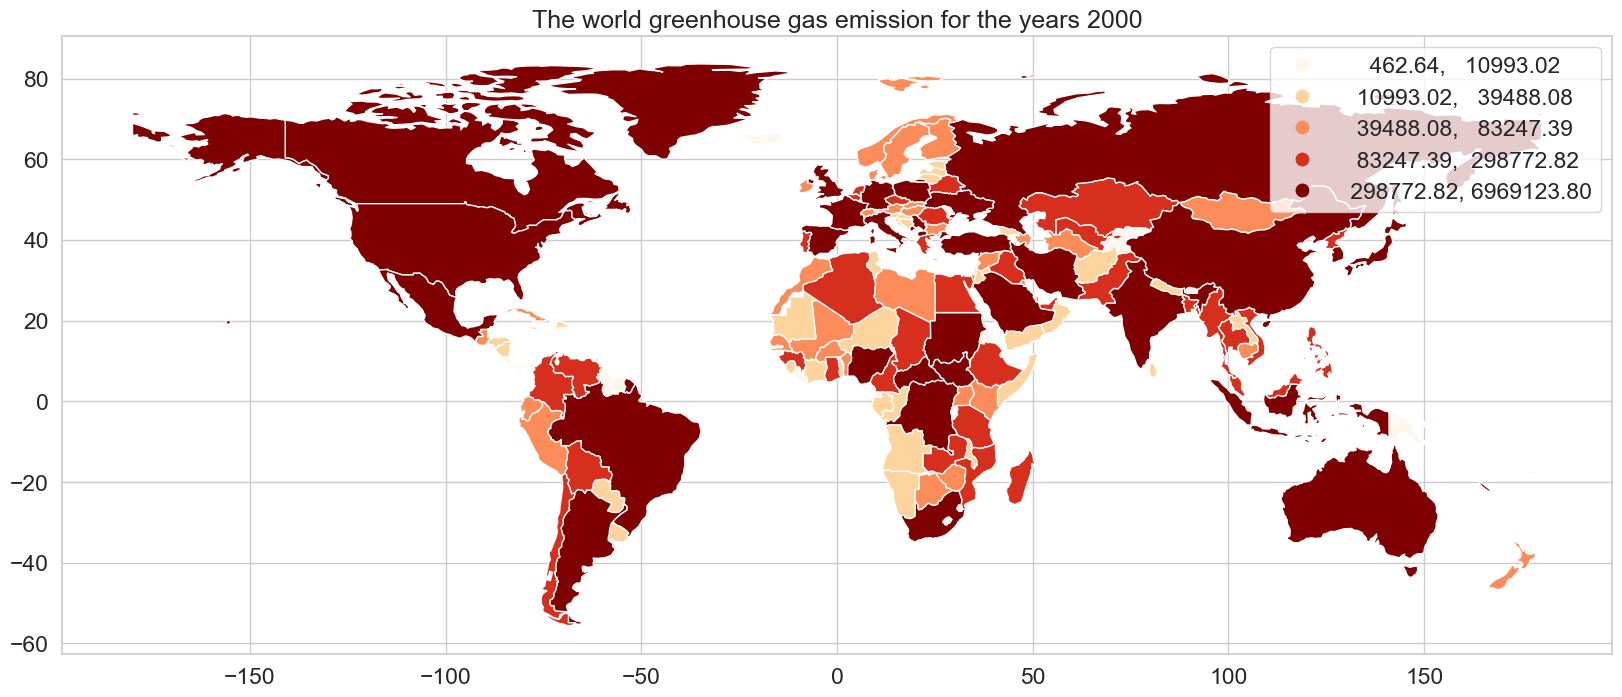

In [30]:
# choropleth maps representing the world greenhouse gas emission for the years 2000
cmap='OrRd'
world_merged.plot(
    column="2000",legend=True,scheme='quantiles', cmap=cmap, label='Country Name',
    figsize=(20, 15),missing_kwds={"color": "lightgrey", 
                  "label": "No Data", "hatch": "///","edgecolor": "red"})
plt.title(f'The world greenhouse gas emission for the years 2000')


## Visualization of choropleth maps representing the world greenhouse gas emission for the years 2010

In [31]:
df_2010=world_merged[['Country Name','2010']]

df_2010.sort_values(by=['2010'], ascending=False).tail(10)

,Country Name,2010
23,Lesotho,3425.278898
70,Eswatini,3378.339014
97,Bhutan,3220.400380
42,Puerto Rico,3199.245683
60,Liberia,2758.546871
160,Djibouti,2629.832574
0,Fiji,2163.922287
36,Belize,1498.878450
21,Timor-Leste,940.459643
86,Vanuatu,433.765842


Text(0.5, 1.0, 'The world greenhouse gas emission for the years 2010')

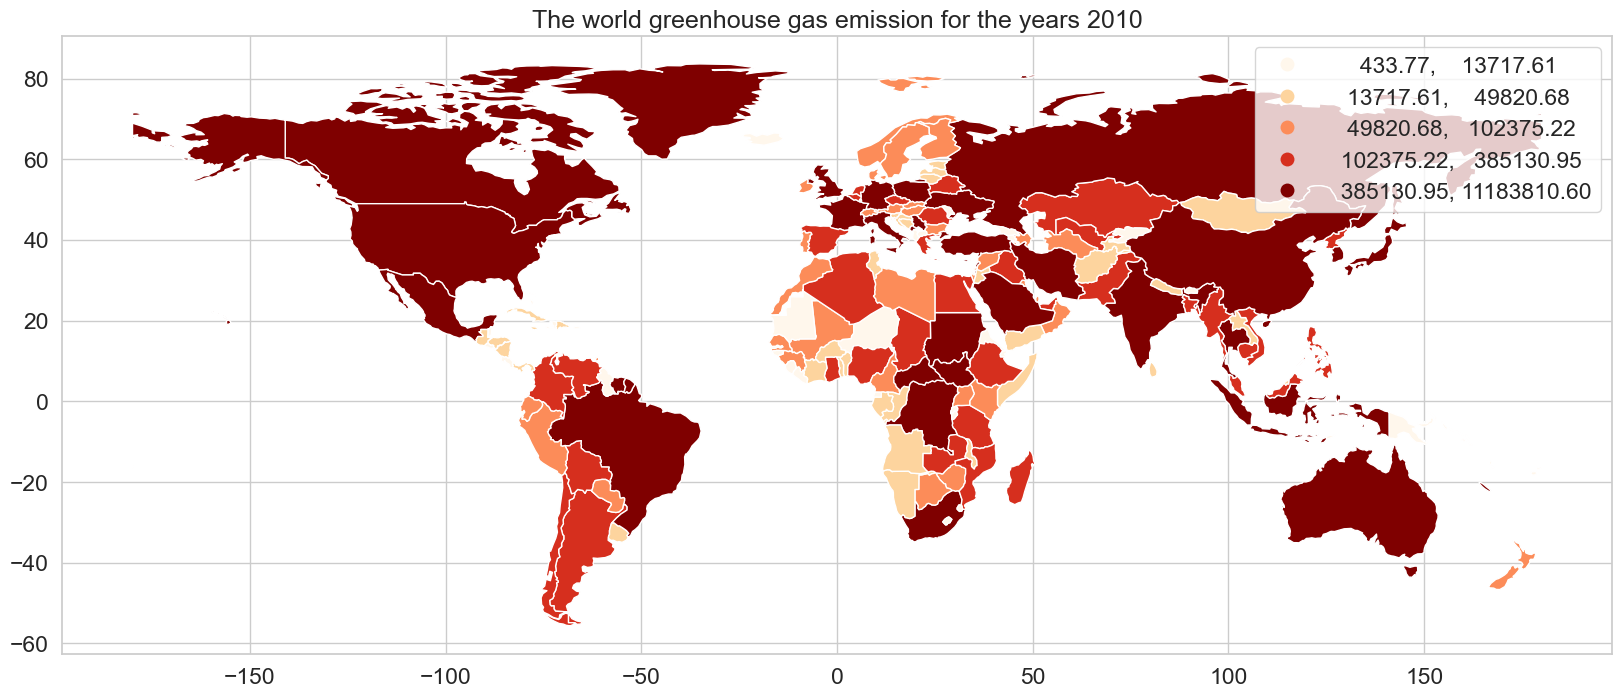

In [32]:
#choropleth maps representing the world greenhouse gas emission for the years 2010¶
cmap='OrRd'
world_merged.plot(
    column="2010",legend=True, cmap=cmap, scheme='quantiles',
    figsize=(20, 15),
    missing_kwds={"color": "lightgrey", 
                  "label": "No Data", "hatch": "///","edgecolor": "red"})
plt.title(f'The world greenhouse gas emission for the years 2010')

### The interpretation of the generated map

## Task 1.2: Analysis of geospatial datasets

## Pre-processing of the dataset (World Total Population) 

### Importing Dataset

In [33]:
#Importing Data API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv
df2=pd.read_csv(r"C:\Users\USER\Desktop\geospatial dataset\API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv",skiprows=4 )

###  World Total Population Dataset

### Display the dataset

In [34]:
df2.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


### The dimension of the Dataset

In [35]:
# Let's look the dimensions of the Data (API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv)
print(f'The Data-Set contains {df2.shape[0]} Rows and {df2.shape[1]} Columns')

The Data-Set contains 266 Rows and 67 Columns


In [36]:
#df2.drop(df2.index[[104,110,135,136,139,140,259]], axis=0, inplace=True)

In [37]:
### Checking for duplicate 
df2.duplicated().sum()

0

In [38]:
#Find missing values of the data set
#df2.isnull()

In [39]:
#Summation of the missing values
#df2.isna().sum()

In [40]:
#df2.info()

In [41]:
df2.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,0.0
mean,1.172174e+08,1.187633e+08,1.208717e+08,1.234910e+08,1.261315e+08,1.288372e+08,1.316853e+08,1.345256e+08,1.374350e+08,1.404490e+08,...,2.912969e+08,2.951160e+08,2.989277e+08,3.027560e+08,3.065980e+08,3.103591e+08,3.140425e+08,3.176734e+08,3.210893e+08,NaN
std,3.695745e+08,3.739180e+08,3.804316e+08,3.889142e+08,3.974401e+08,4.062000e+08,4.155171e+08,4.247722e+08,4.342805e+08,4.441772e+08,...,9.129343e+08,9.241050e+08,9.352101e+08,9.463321e+08,9.575052e+08,9.683483e+08,9.788967e+08,9.891628e+08,9.988295e+08,NaN
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04,1.087300e+04,NaN
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.767996e+06,1.791783e+06,NaN
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052565e+07,1.054019e+07,NaN
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.157091e+07,6.295547e+07,NaN
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.175500e+09,7.261847e+09,7.347679e+09,7.433651e+09,7.519371e+09,7.602716e+09,7.683806e+09,7.763933e+09,7.836631e+09,NaN


In [42]:
df_p= df2

In [43]:
#df_c2.head()

In [44]:
df_tgge = df_c #Total Greenhouse Gas Emmission
df_popu = df_p #World Population cleaned dataset

### Task 1.2.1 For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries  having populations less than 109856670. Very briefly interpret the generated map. 

In [45]:
df_tgge = df_tgge[['Country Code','2005']]
df_tgge = df_tgge.rename(columns={'2005': '2005_tgge'})
df_tgge

,Country Code,2005_tgge
0,ABW,1.949674e+06
1,AFG,1.477026e+04
2,AGO,3.585574e+04
3,ALB,8.308386e+03
4,AND,1.949674e+06
...,...,...
259,XKX,1.949674e+06
260,YEM,3.266619e+04
261,ZAF,4.983129e+05
262,ZMB,3.964465e+05


In [46]:
df_pop = df_popu[['Country Code','2005']]
df_pop

,Country Code,2005
0,ABW,100028.0
1,AFE,453404076.0
2,AFG,25654274.0
3,AFW,305520588.0
4,AGO,19433604.0
...,...,...
261,XKX,1705780.0
262,YEM,20107416.0
263,ZAF,47880595.0
264,ZMB,11856244.0


In [47]:
#Generate and merger the Geopandas world with the new already merged data
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [48]:
world_=world[['iso_a3','name','geometry']]
world_.head()

,iso_a3,name,geometry
0,FJI,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [49]:
merged_dt=df_pop.merge(df_tgge,on='Country Code')
merged_dt

,Country Code,2005,2005_tgge
0,ABW,100028.0,1.949674e+06
1,AFG,25654274.0,1.477026e+04
2,AGO,19433604.0,3.585574e+04
3,ALB,3011487.0,8.308386e+03
4,AND,78871.0,1.949674e+06
...,...,...,...
259,XKX,1705780.0,1.949674e+06
260,YEM,20107416.0,3.266619e+04
261,ZAF,47880595.0,4.983129e+05
262,ZMB,11856244.0,3.964465e+05


In [50]:
world_merger = world_.merge(merged_dt, left_on ='iso_a3', right_on='Country Code')

In [51]:
world_merger

,iso_a3,name,geometry,Country Code,2005,2005_tgge
0,FJI,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,821606.0,1.836070e+03
1,TZA,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,38450323.0,2.695590e+05
2,CAN,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,32243753.0,8.497987e+05
3,USA,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,295516599.0,7.182808e+06
4,KAZ,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,15147029.0,2.916410e+05
...,...,...,...,...,...,...
164,MKD,North Macedonia,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MKD,2036855.0,1.159160e+04
165,SRB,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,7440769.0,1.949674e+06
166,MNE,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,614261.0,1.949674e+06
167,TTO,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,1296497.0,4.392204e+04


In [52]:
year_2005 = world_merger[(world_merger["2005"] < 109856670)]
year_2005.sort_values(by=['2005_tgge','2005'], ascending=False).tail(10)

,iso_a3,name,geometry,Country Code,2005,2005_tgge
77,GMB,Gambia,"POLYGON ((-16.71373 13.59496, -15.62460 13.623...",GMB,1543745.0,3001.60000
70,SWZ,eSwatini,"POLYGON ((32.07167 -26.73382, 31.86806 -27.177...",SWZ,1030575.0,2940.41360
39,SUR,Suriname,"POLYGON ((-54.52475 2.31185, -55.09759 2.52375...",SUR,499461.0,2577.08350
160,DJI,Djibouti,"POLYGON ((42.35156 12.54223, 42.77964 12.45542...",DJI,783248.0,2160.03724
60,LBR,Liberia,"POLYGON ((-8.43930 7.68604, -8.48545 7.39521, ...",LBR,3218114.0,2082.70263
36,BLZ,Belize,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",BLZ,283798.0,2022.18417
0,FJI,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,821606.0,1836.06990
97,BTN,Bhutan,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",BTN,648744.0,1617.86441
21,TLS,Timor-Leste,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656...",TLS,995130.0,885.58214
86,VUT,Vanuatu,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",VUT,209282.0,436.13738


Text(0.5, 1.0, 'Choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670 for the years 2005')

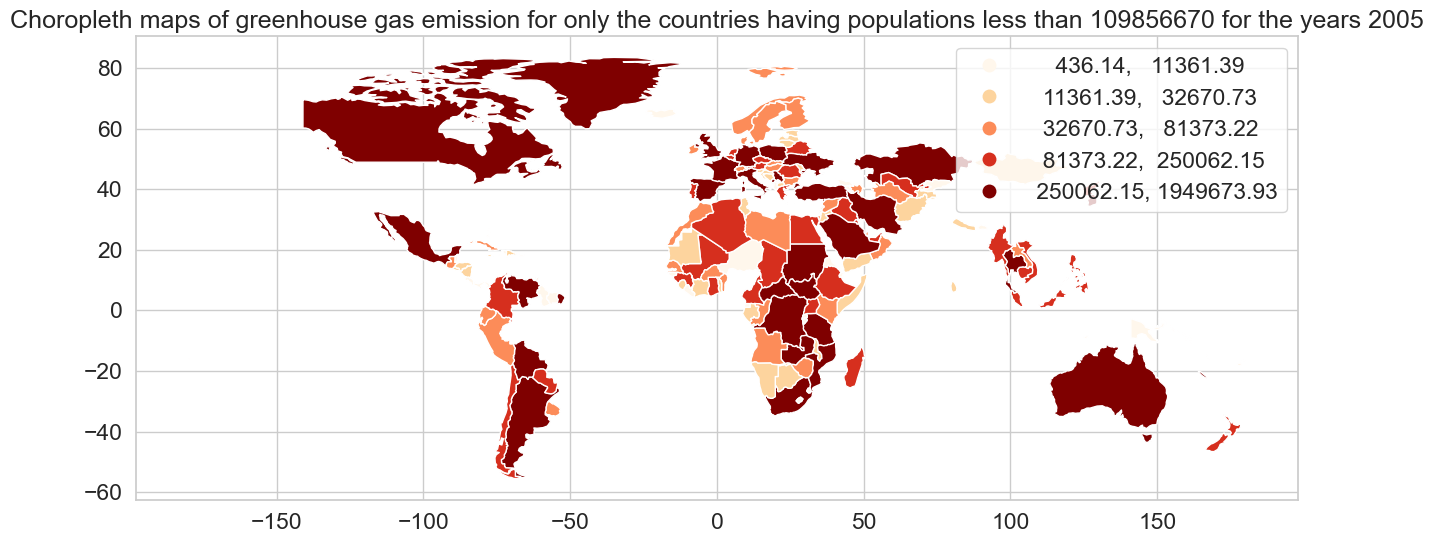

In [53]:
fig,ax = plt.subplots(figsize=(15,13), subplot_kw=dict(aspect='equal'))
year_2005.plot(column='2005_tgge', scheme='Quantiles',k=5,cmap='OrRd',ax=ax, legend=True)
plt.title(f'Choropleth maps of greenhouse gas emission for only the countries having populations less than 109856670 for the years 2005')

###  The interpretation of the generated map 

## Task 1.2.2: For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507. Very briefly interpret the generated map.

In [54]:
year_2005_2 = world_merger[(world_merger["2005"] > 236200507)]
year_2005_2.sort_values(by=['2005_tgge','2005'], ascending=False).head(10)

,iso_a3,name,geometry,Country Code,2005,2005_tgge
136,CHN,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",CHN,1.303720e+09,7803535.60
3,USA,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,2.955166e+08,7182808.40
95,IND,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",IND,1.147610e+09,2117460.59


Text(0.5, 1.0, 'Choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507 for the years 2005')

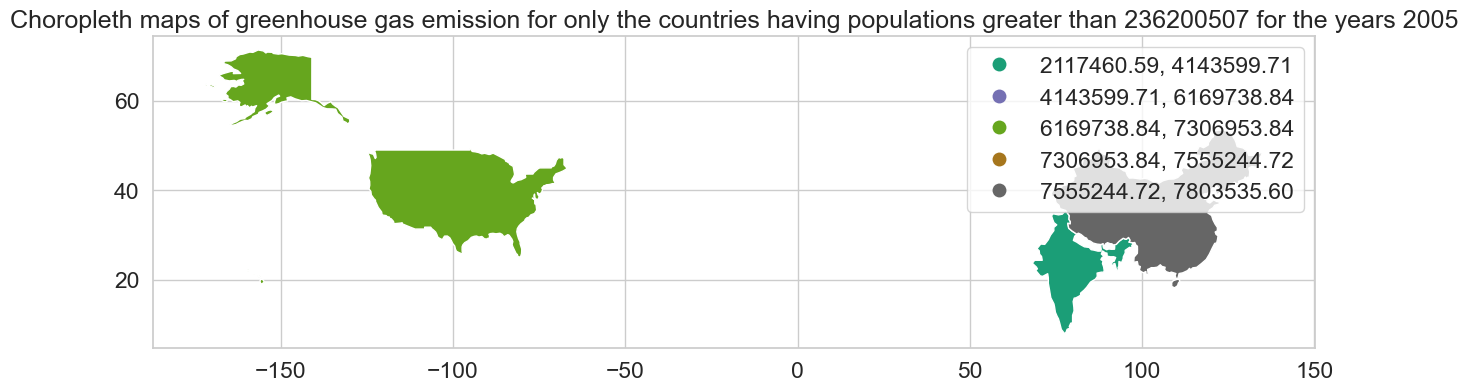

In [55]:
fig,ax = plt.subplots(figsize=(15,13), subplot_kw=dict(aspect='equal'))
year_2005_2.plot(column='2005_tgge',scheme='Quantiles',k=5,cmap='Dark2',ax=ax, legend=True)
plt.title(f'Choropleth maps of greenhouse gas emission for only the countries having populations greater than 236200507 for the years 2005')

###  The interpretation of the generated map

### Task 1.2.3: For the year 2005, generate choropleth maps of greenhouse gas emission for only the countries having a population between 842881 and 80890450. Very briefly interpret the generated map.


In [56]:
year_2005_3 = world_merger[(world_merger["2005"] > 842881) & world_merger["2005"] < 80890450]
year_2005_3.sort_values(by=['2005_tgge','2005'], ascending=False).tail(5)

,iso_a3,name,geometry,Country Code,2005,2005_tgge
36,BLZ,Belize,"POLYGON ((-89.14308 17.80832, -89.15091 17.955...",BLZ,283798.0,2022.18417
0,FJI,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,821606.0,1836.06990
97,BTN,Bhutan,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",BTN,648744.0,1617.86441
21,TLS,Timor-Leste,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656...",TLS,995130.0,885.58214
86,VUT,Vanuatu,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",VUT,209282.0,436.13738


<Axes: >

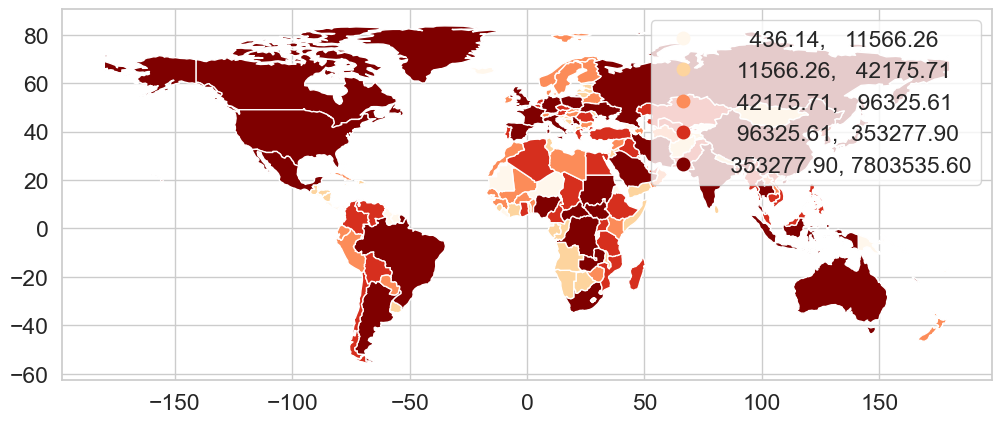

In [57]:
fig,ax = plt.subplots(figsize=(12,10), subplot_kw=dict(aspect='equal'))
year_2005_3.plot(column='2005_tgge', scheme='Quantiles',k=5,cmap='OrRd',ax=ax, legend=True)

###  The interpretation of the generated map

## Task 1.2.4: Plot (scatter or line plot) the percentage change in greenhouse gas emission from 2000 to 2010, for the country that has the highest population in 2010. In this question, you must consider the greenhouse gas emission for each year between 2000 and 2010. Very briefly interpret the generated plot

In [58]:
# reuse cleaned Population dataset.
df_popu_dtset= df_popu
df_popu_dtset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0,NaN


In [59]:
df_popu_dtset.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')

In [60]:
#Select columns for use from population dataset
col_set = ['Country Name', 'Country Code', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010']
df_popu_dts = df_popu_dtset[col_set]
df_popu_dts.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Aruba,ABW,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,101452.0,101665.0
1,Africa Eastern and Southern,AFE,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,504604672.0,518468229.0
2,Afghanistan,AFG,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,28394806.0,29185511.0
3,Africa Western and Central,AFW,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,341050537.0,350556886.0
4,Angola,AGO,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0


In [61]:
### feature selection / filter for relevant columns
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [62]:
#Rename the iso_a3 column to Country Code
world.rename(columns={'iso_a3': 'Country Code'}, inplace=True)
world= world[['Country Code']]
world.head()

,Country Code
0,FJI
1,TZA
2,ESH
3,CAN
4,USA


In [63]:
#Merge the population dataframe with world dataframe
df_pop_dt = world.merge(df_popu_dts,how='left')
df_pop_dt.head()

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,FJI,Fiji,811011.0,813923.0,815257.0,816078.0,817864.0,821606.0,827869.0,836185.0,845356.0,853636.0,859816.0
1,TZA,Tanzania,33499177.0,34385849.0,35334790.0,36337778.0,37379766.0,38450323.0,39548666.0,40681416.0,41853944.0,43073830.0,44346532.0
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,Canada,30685730.0,31020902.0,31360079.0,31644028.0,31940655.0,32243753.0,32571174.0,32889025.0,33247118.0,33628895.0,34004889.0
4,USA,United States,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,295516599.0,298379912.0,301231207.0,304093966.0,306771529.0,309327143.0


In [64]:
df_tgge_=df_c
df_tgge_ = df_tgge_[['Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']]
df_tgge_.head()

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,ABW,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06
1,AFG,1.353095e+04,1.258540e+04,1.384274e+04,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04
2,AGO,3.478068e+04,3.437184e+04,3.449037e+04,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04
3,ALB,8.389277e+03,6.820624e+03,7.503060e+03,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03
4,AND,1.629289e+06,1.617223e+06,1.747142e+06,1.807670e+06,1.843928e+06,1.949674e+06,2.017811e+06,2.076139e+06,2.012251e+06,1.996157e+06,2.149223e+06


### Find the country with highest population in 2010 

In [65]:
### find the country with highest population idn 2010.
df_pop_dt.iloc[df_pop_dt['2010'].idxmax()]

Country Code             CHN
Country Name           China
2000            1262645000.0
2001            1271850000.0
2002            1280400000.0
2003            1288400000.0
2004            1296075000.0
2005            1303720000.0
2006            1311020000.0
2007            1317885000.0
2008            1324655000.0
2009            1331260000.0
2010            1337705000.0
Name: 139, dtype: object

In [66]:
### find the country with highest population idn 2010.
df_pop_dt.iloc[df_pop_dt['2010'].idxmax()]['Country Code']


'CHN'

## The country that has the highest population in 2010

In [67]:
df_China= df_tgge_.loc[df_tgge_['Country Code']=='CHN']

## The percentage change in greenhouse gas emission from 2000 to 2010

In [68]:
df_China.iloc[:,1:].pct_change(axis=1).T

,38
2000,NaN
2001,0.012434
2002,0.064016
2003,0.137362
2004,0.142875
2005,0.096519
2006,0.098655
2007,0.064228
2008,0.098419
2009,0.059393


<Axes: >

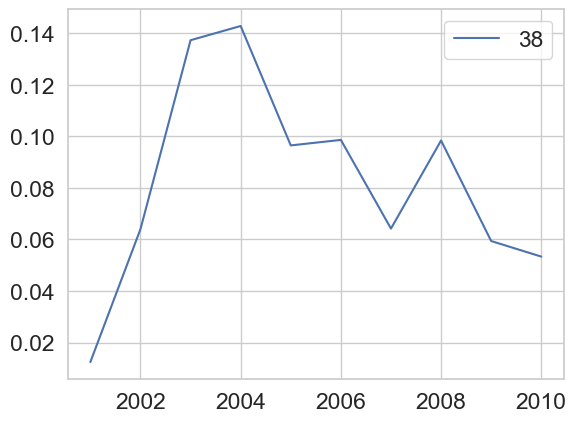

In [69]:
df_China.iloc[:,1:].pct_change(axis=1).T.plot(kind='line')

### Plot Analysis

### Task 1.2.5 Present a scatter plot between the mean population of each country and mean greenhouse gas  emission considering from year 2000 until 2010. Very briefly interpret the generated plot, particularly  look for any correlation (if present) among the plotted variables. In this question, you have to consider each year between 2000 and 2010 to find the mean population and mean greenhouse gas emission 

In [70]:
column_pop_set=df_popu_dts #Population
column_ghge_set=df_tgge_ # Green House Emission

In [71]:
#column_pop_set.head()
#column_ghge_set.head()

In [72]:
df_ghge_s = world.merge(column_ghge_set,how='left')
df_ghge_s.head()

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,FJI,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03
1,TZA,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05
4,USA,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06


### Calculate the Mean Greenhouse Gas Emission considering from year 2000 until 2010

In [73]:
df_ghge_s['mean_gge']= df_ghge_s.mean(axis=1,numeric_only= True)

In [74]:
df_ghge_s.head()

,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_gge
0,FJI,1.574685e+03,1.639360e+03,1.806999e+03,1.931688e+03,1.810480e+03,1.836070e+03,1.945971e+03,2.097696e+03,2.123963e+03,2.336075e+03,2.163922e+03,1.933355e+03
1,TZA,2.159394e+05,1.967012e+05,1.836621e+05,2.597279e+05,2.213489e+05,2.695590e+05,1.675008e+05,2.022249e+05,2.014045e+05,2.314563e+05,2.341472e+05,2.166975e+05
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,7.606430e+05,7.185345e+05,9.086862e+05,9.513730e+05,1.040137e+06,8.497987e+05,8.949226e+05,8.920668e+05,9.089260e+05,7.498637e+05,7.641377e+05,8.580990e+05
4,USA,6.969124e+06,6.821236e+06,6.981787e+06,6.991255e+06,7.244272e+06,7.182808e+06,6.994087e+06,7.128952e+06,6.648991e+06,6.604069e+06,6.713349e+06,6.934539e+06


### Calculate the Mean Population of each country

In [75]:
df_pop_dt['mean_popu']= df_pop_dt.mean(axis=1,numeric_only= True)

In [76]:
df_pop_dt.head()

,Country Code,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,mean_popu
0,FJI,Fiji,811011.0,813923.0,815257.0,816078.0,817864.0,821606.0,827869.0,836185.0,845356.0,853636.0,859816.0,8.289637e+05
1,TZA,Tanzania,33499177.0,34385849.0,35334790.0,36337778.0,37379766.0,38450323.0,39548666.0,40681416.0,41853944.0,43073830.0,44346532.0,3.862655e+07
2,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CAN,Canada,30685730.0,31020902.0,31360079.0,31644028.0,31940655.0,32243753.0,32571174.0,32889025.0,33247118.0,33628895.0,34004889.0,3.229420e+07
4,USA,United States,282162411.0,284968955.0,287625193.0,290107933.0,292805298.0,295516599.0,298379912.0,301231207.0,304093966.0,306771529.0,309327143.0,2.957264e+08


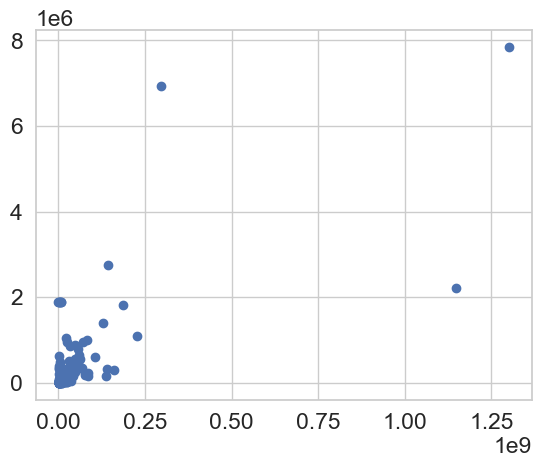

In [77]:
plt.scatter(df_pop_dt['mean_popu'], df_ghge_s['mean_gge'])

### Plot Analysis

# PART 2 – Geospatial Sentiment Analysis using Social Media Data

## Task 2.1: Data Pre-processing 

## Import Dataset 

In [78]:
#Importing Data covid19_tweets.csv
df_covid=pd.read_csv(r"C:\Users\USER\Desktop\geospatial dataset\covid19_tweets.csv")

In [79]:
df_covid.shape

(179108, 13)

In [80]:
#df_covid.head()

In [81]:
#Check the Uniqueness of user Locations
#len(df_covid['user_location'].unique())

## Task 2.1: Data Pre-processing 

In [82]:
#Drop columns not related to this analysis
# Drop Columns
drop_columns = [
    'user_name',
    'date',
    'user_description',
    'user_created',
    'user_followers',
    'user_friends',
    'user_favourites',
    'user_verified',
    'hashtags',
    'source',
    'is_retweet'
]

df_covid.drop(columns=drop_columns, inplace=True)
df_covid.head()

,user_location,text
0,astroworld,If I smelled the scent of hand sanitizers toda...
1,"New York, NY",Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,"Pewee Valley, KY",@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,Stuck in the Middle,@brookbanktv The one gift #COVID19 has give me...
4,Jammu and Kashmir,25 July : Media Bulletin on Novel #CoronaVirus...


In [83]:
#To extract correct name of countries we shall use geopandas tool to look up for correct coutry names

### feature selection / filter for relevant columns
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world



,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [84]:
#select countries and geometry
world=world[['name','geometry']]
world.head()

,name,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [85]:
#Merger the dataset with world dataset
twitter_data = df_covid.merge(world, how='inner', left_on='user_location', right_on='name')

In [86]:
twitter_data

,user_location,text,name,geometry
0,South Africa,Our CEO @RamneekHH live with @SASCO_Jikelele W...,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
1,South Africa,I hate #Covid19 coz it made me lose the love o...,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
2,South Africa,#AndrewMlangeni Memorial: @MYANC urges mourner...,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
3,South Africa,"#Covid19 pandemic live responsible people, pro...",South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
4,South Africa,@City_Ekurhuleni #Covid19 pandemic live respon...,South Africa,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082..."
...,...,...,...,...
13607,Angola,@elmaestrosopho @bryancsk @AFP The virus was d...,Angola,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
13608,Peru,"@matuk @omarpinedo @not_ccd One question, why ...",Peru,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251..."
13609,Paraguay,My super helper in the kitchen 👩‍🍳🐶 \n.\n#COVI...,Paraguay,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7..."
13610,Paraguay,Ouch.. American Journal of Epidemiology.. 29/0...,Paraguay,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7..."


### Randomly retrieve 500 tweets where user locations are available

In [87]:
#randomly retrieve 500 tweets where user locations are available
df_extract=twitter_data[twitter_data['user_location'].notnull()].sample(n=500, random_state=1)
df_extract

,user_location,text,name,geometry
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400..."
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37..."
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394..."
...,...,...,...,...
13003,Cameroon,Businesses need to be setup to survive any cri...,Cameroon,"POLYGON ((14.49579 12.85940, 14.89336 12.21905..."
9425,Pakistan,Traders of Punjab rejected the decision to clo...,Pakistan,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
13195,Kuwait,The F-Virus Don't Be afraid we Can get to safe...,Kuwait,"POLYGON ((47.97452 29.97582, 48.18319 29.53448..."
5329,India,Update : India sets a world record with close ...,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."


In [88]:
#Rename name to Country name
df_extract = df_extract.rename({'name': 'CountryName'}, axis=1)

In [89]:
df_extract.head()

,user_location,text,CountryName,geometry
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400..."
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37..."
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394..."


### Cleaning tweets 

In [90]:
#Make text lowercase, remove text in square brackets, remove links, remove punctuation
    #and remove words containing numbers.
def clean_data(text):
    

    text = text.lower()  # lowercase
    text = re.sub(r'@[A-Za-z0-9_]+' , '' , text)   #remove mentions
    text = re.sub(r'#' , '' , text) #remove hashtags
    text = re.sub(r'RT : ','' , text) # remove retweets
    text = re.sub(r'https?:\/\/[A-Za-z0-9\./\/]+' , '' , text) #removes url
    text = re.sub('\[.*?\]' , '' , text) #remove square brackets
    text = re.sub(r'[^\w\s]' , '' , text) #remove puntuations
    text = re.sub('\w*\d\w*' , '' ,text) #removes words containig numbers
    text = re.sub('\n' , '' ,text) #remove new lines
    return text

In [91]:
## applying function
df_extract['cleaned_tweet'] = df_extract['text'].apply(clean_data)

In [92]:
df_extract.head()

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi we are israeli scientists studying the se...
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter as at pm jamaica recorded cases ...
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally the public is taking notice of all the...
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",my twopart editorial series for explores imp...
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",an honour to cochair these consultations on ou...


In [93]:
clean_data = df_extract.copy()
clean_data.head()

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi we are israeli scientists studying the se...
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter as at pm jamaica recorded cases ...
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally the public is taking notice of all the...
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",my twopart editorial series for explores imp...
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",an honour to cochair these consultations on ou...


In [94]:
#nltk.download()

In [95]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
#Tokenization
clean_data['cleaned_tweet'] = clean_data.apply(lambda row: word_tokenize(row['cleaned_tweet']), axis=1)

In [97]:
clean_data.head()

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...","[hi, we, are, israeli, scientists, studying, t..."
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...","[coronameter, as, at, pm, jamaica, recorded, c..."
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...","[finally, the, public, is, taking, notice, of,..."
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...","[my, twopart, editorial, series, for, explores..."
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...","[an, honour, to, cochair, these, consultations..."


In [98]:
#Remove stop words
clean_data['cleaned_tweet'] = clean_data.apply(lambda row: (" ".join([word for word in row['cleaned_tweet'] if word not in stopwords])),axis=1)

In [99]:
clean_data

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...
...,...,...,...,...,...
13003,Cameroon,Businesses need to be setup to survive any cri...,Cameroon,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...",businesses need setup survive crisis patron me...
9425,Pakistan,Traders of Punjab rejected the decision to clo...,Pakistan,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",traders punjab rejected decision close markets...
13195,Kuwait,The F-Virus Don't Be afraid we Can get to safe...,Kuwait,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",fvirus dont afraid get safety togather صباح_ال...
5329,India,Update : India sets a world record with close ...,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",update india sets world record close fresh cas...


In [100]:
#remove comma
clean_data['user_location']=clean_data['user_location'].apply(lambda x:x.replace(',',' '))
clean_data

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...
...,...,...,...,...,...
13003,Cameroon,Businesses need to be setup to survive any cri...,Cameroon,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...",businesses need setup survive crisis patron me...
9425,Pakistan,Traders of Punjab rejected the decision to clo...,Pakistan,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",traders punjab rejected decision close markets...
13195,Kuwait,The F-Virus Don't Be afraid we Can get to safe...,Kuwait,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",fvirus dont afraid get safety togather صباح_ال...
5329,India,Update : India sets a world record with close ...,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",update india sets world record close fresh cas...


## GEOCODING 

## Extract Country with GeoPy 

In [101]:
geopy_df = clean_data
geopy_df

,user_location,text,CountryName,geometry,cleaned_tweet
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...
...,...,...,...,...,...
13003,Cameroon,Businesses need to be setup to survive any cri...,Cameroon,"POLYGON ((14.49579 12.85940, 14.89336 12.21905...",businesses need setup survive crisis patron me...
9425,Pakistan,Traders of Punjab rejected the decision to clo...,Pakistan,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",traders punjab rejected decision close markets...
13195,Kuwait,The F-Virus Don't Be afraid we Can get to safe...,Kuwait,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",fvirus dont afraid get safety togather صباح_ال...
5329,India,Update : India sets a world record with close ...,India,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",update india sets world record close fresh cas...


In [ ]:
geopy_df.head()

,user_location,text,CountryName,geometry,cleaned_tweet,GeocodedLocation,Latitude,Longitude,Polarity,Sentiment
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...,"(ישראל, (30.8124247, 34.8594762))",30.812425,34.859476,0.0,Neutral
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...,"(Jamaica, (18.1850507, -77.3947693))",18.185051,-77.394769,0.0,Neutral
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...,"(Türkiye, (38.9597594, 34.9249653))",38.959759,34.924965,0.0,Neutral
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575,0.0,Neutral
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...,"(ព្រះរាជាណាចក្រ​កម្ពុជា, (12.5433216, 104.8144...",12.543322,104.814491,0.0,Neutral


In [ ]:
geopy_df.shape

(500, 8)

In [ ]:
#unique_list = (geopy_df['CountryName'].unique().tolist())

In [ ]:
#unique_list

# Calculate the Polatity of all the tweets 

In [ ]:
df_senti=geopy_df

## Using TextBlob calculate the polarity 

In [ ]:
def cal_polarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
df_senti['Polarity'] = df_senti['cleaned_tweet'].apply(cal_polarity)

In [ ]:
df_senti.head()

,user_location,text,CountryName,geometry,cleaned_tweet,GeocodedLocation,Latitude,Longitude,Polarity
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...,"(ישראל, (30.8124247, 34.8594762))",30.812425,34.859476,0.0
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...,"(Jamaica, (18.1850507, -77.3947693))",18.185051,-77.394769,0.0
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...,"(Türkiye, (38.9597594, 34.9249653))",38.959759,34.924965,0.0
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575,0.0
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...,"(ព្រះរាជាណាចក្រ​កម្ពុជា, (12.5433216, 104.8144...",12.543322,104.814491,0.0


In [ ]:
# Classify overall sentiment
def lablAnalysis(i):
    if i < 0:
        return 'Negative'
    elif i == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
df_senti['Sentiment'] = df_senti['Polarity'].apply(lablAnalysis)

In [ ]:
df_senti.head()

,user_location,text,CountryName,geometry,cleaned_tweet,GeocodedLocation,Latitude,Longitude,Polarity,Sentiment
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...,"(ישראל, (30.8124247, 34.8594762))",30.812425,34.859476,0.0,Neutral
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...,"(Jamaica, (18.1850507, -77.3947693))",18.185051,-77.394769,0.0,Neutral
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...,"(Türkiye, (38.9597594, 34.9249653))",38.959759,34.924965,0.0,Neutral
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575,0.0,Neutral
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...,"(ព្រះរាជាណាចក្រ​កម្ពុជា, (12.5433216, 104.8144...",12.543322,104.814491,0.0,Neutral


In [ ]:
df_senti.shape

(500, 10)

In [ ]:
df_senti[["Polarity"]].describe()


,Polarity
count,500.000000
mean,0.074412
std,0.208276
min,-0.714286
25%,0.000000
50%,0.000000
75%,0.137879
max,0.800000


Neutral     229
Positive    200
Negative     71
Name: Sentiment, dtype: int64


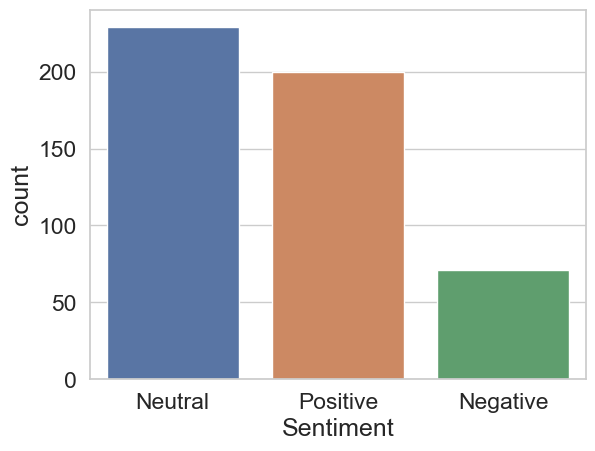

In [ ]:
print(df_senti.Sentiment.value_counts())
sns.countplot(x='Sentiment', data = df_senti);

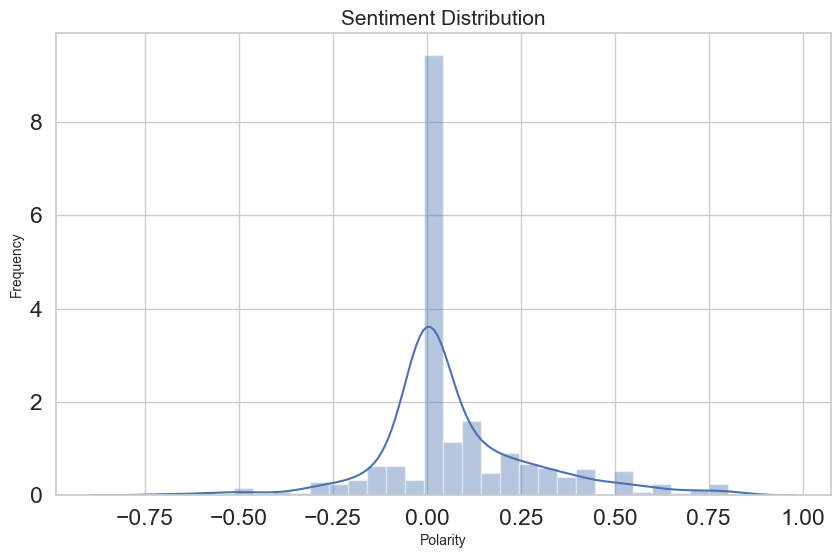

In [ ]:
#Sentiment distribution
plt.figure(figsize=(10,6))
sns.distplot(df_senti['Polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 10)
plt.ylabel('Frequency',size = 10)
plt.show();

### Average Polarity Values 

In [ ]:
df_av_pola=df_senti.groupby('CountryName')['Polarity'].mean()

In [ ]:
df_av_pola.head()

CountryName
Afghanistan   -0.179167
Armenia        0.400000
Australia      0.072781
Bangladesh     0.000000
Brazil        -0.133333
Name: Polarity, dtype: float64

###  plot  average polarity value by Locations 

<Axes: title={'center': 'Sentiment Score'}, xlabel='Country Names', ylabel='Average Polarty Score'>

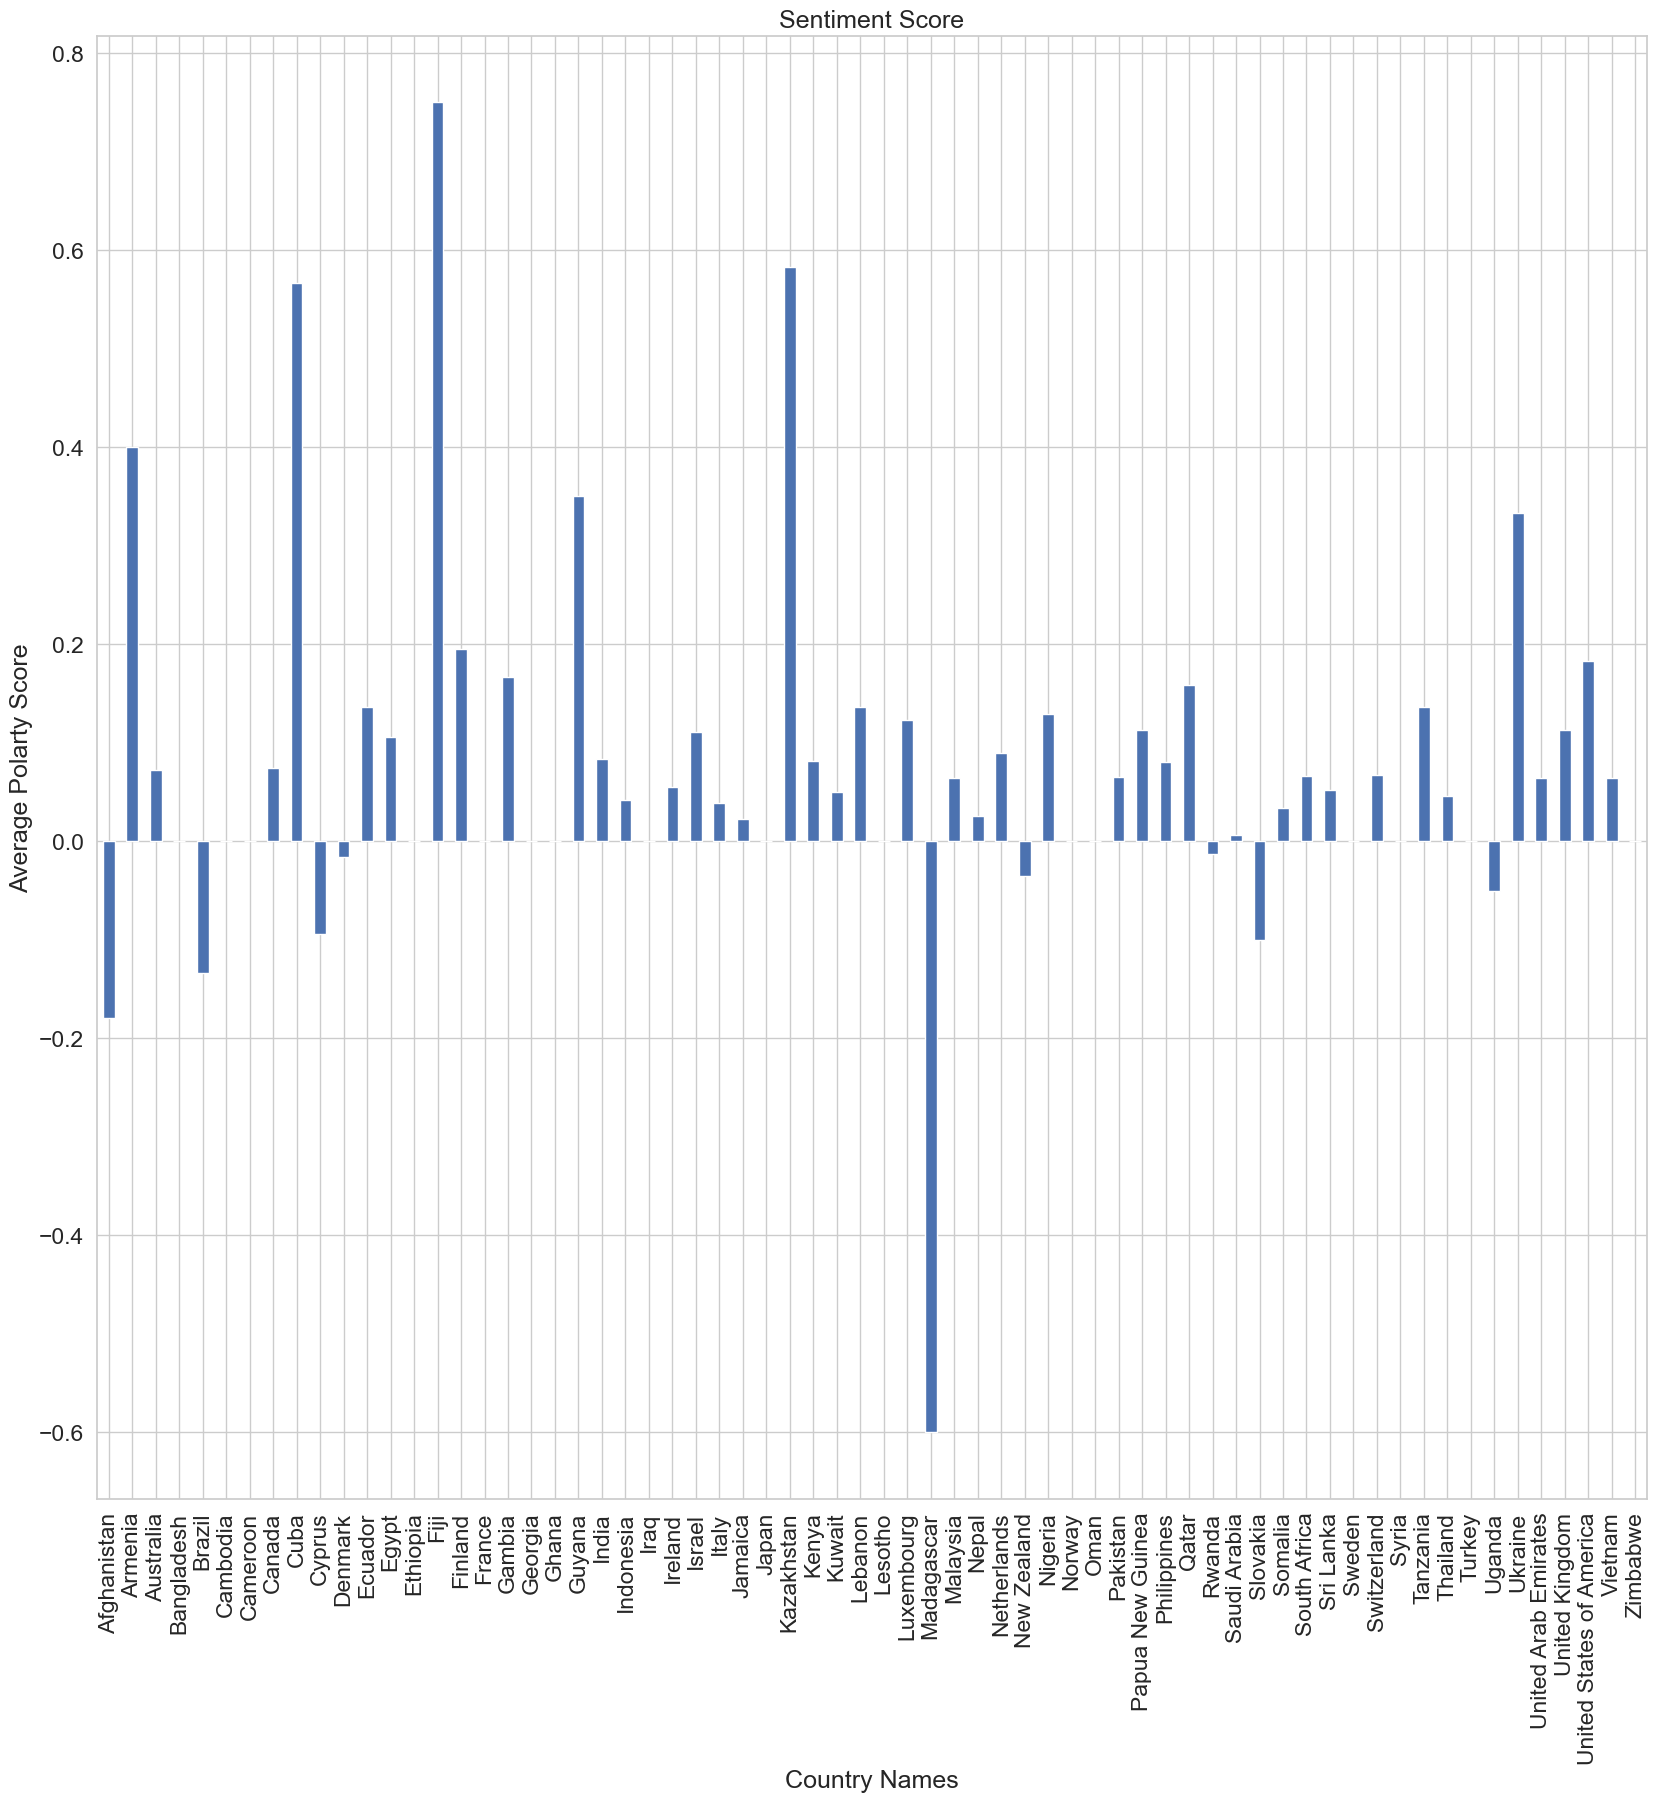

In [ ]:
df_av_pola.plot(kind='bar', title='Sentiment Score', ylabel='Average Polarty Score',
         xlabel='Country Names', figsize=(20, 19))

## Task 2.4 Subjectivity analysis

## Using TextBlob calculate the Subjectivity  

In [ ]:
def cal_subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [ ]:
df_senti['Subjectivity'] = df_senti['cleaned_tweet'].apply(cal_subjectivity)

In [ ]:
df_senti.head()

,user_location,text,CountryName,geometry,cleaned_tweet,GeocodedLocation,Latitude,Longitude,Polarity,Sentiment,Subjectivity
12063,Israel,@thefirstindia @MoHFW_INDIA Hi! We are Israeli...,Israel,"POLYGON ((35.71992 32.70919, 35.54567 32.39399...",hi israeli scientists studying sense smell rec...,"(ישראל, (30.8124247, 34.8594762))",30.812425,34.859476,0.0,Neutral,0.000000
13355,Jamaica,"#CoronaMeter: As at 1 p.m., Jamaica recorded 8...",Jamaica,"POLYGON ((-77.56960 18.49053, -76.89662 18.400...",coronameter pm jamaica recorded cases seven hu...,"(Jamaica, (18.1850507, -77.3947693))",18.185051,-77.394769,0.0,Neutral,0.000000
13142,Turkey,"Finally, the public is taking notice of all th...",Turkey,"MULTIPOLYGON (((44.77268 37.17044, 44.29345 37...",finally public taking notice tools sorrentothe...,"(Türkiye, (38.9597594, 34.9249653))",38.959759,34.924965,0.0,Neutral,0.066667
8635,United Kingdom,My two-part editorial series for @AtwoodMagazi...,United Kingdom,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",twopart editorial series explores impacts inde...,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575,0.0,Neutral,0.125000
12663,Cambodia,An honour to co-chair these consultations on o...,Cambodia,"POLYGON ((102.58493 12.18659, 102.34810 13.394...",honour cochair consultations plan cooperation ...,"(ព្រះរាជាណាចក្រ​កម្ពុជា, (12.5433216, 104.8144...",12.543322,104.814491,0.0,Neutral,0.000000


### Average Subjectivity Values 

In [ ]:
df_av_subj=df_senti.groupby('CountryName')['Subjectivity'].mean()

In [ ]:
df_av_subj.head()

CountryName
Afghanistan    0.337500
Armenia        1.000000
Australia      0.289452
Bangladesh     0.000000
Brazil         0.600000
Name: Subjectivity, dtype: float64

### plot average Subjectivity value by Locations 

<Axes: title={'center': 'Sentiment Score'}, xlabel='Country Names', ylabel='Average Subjectivity Score'>

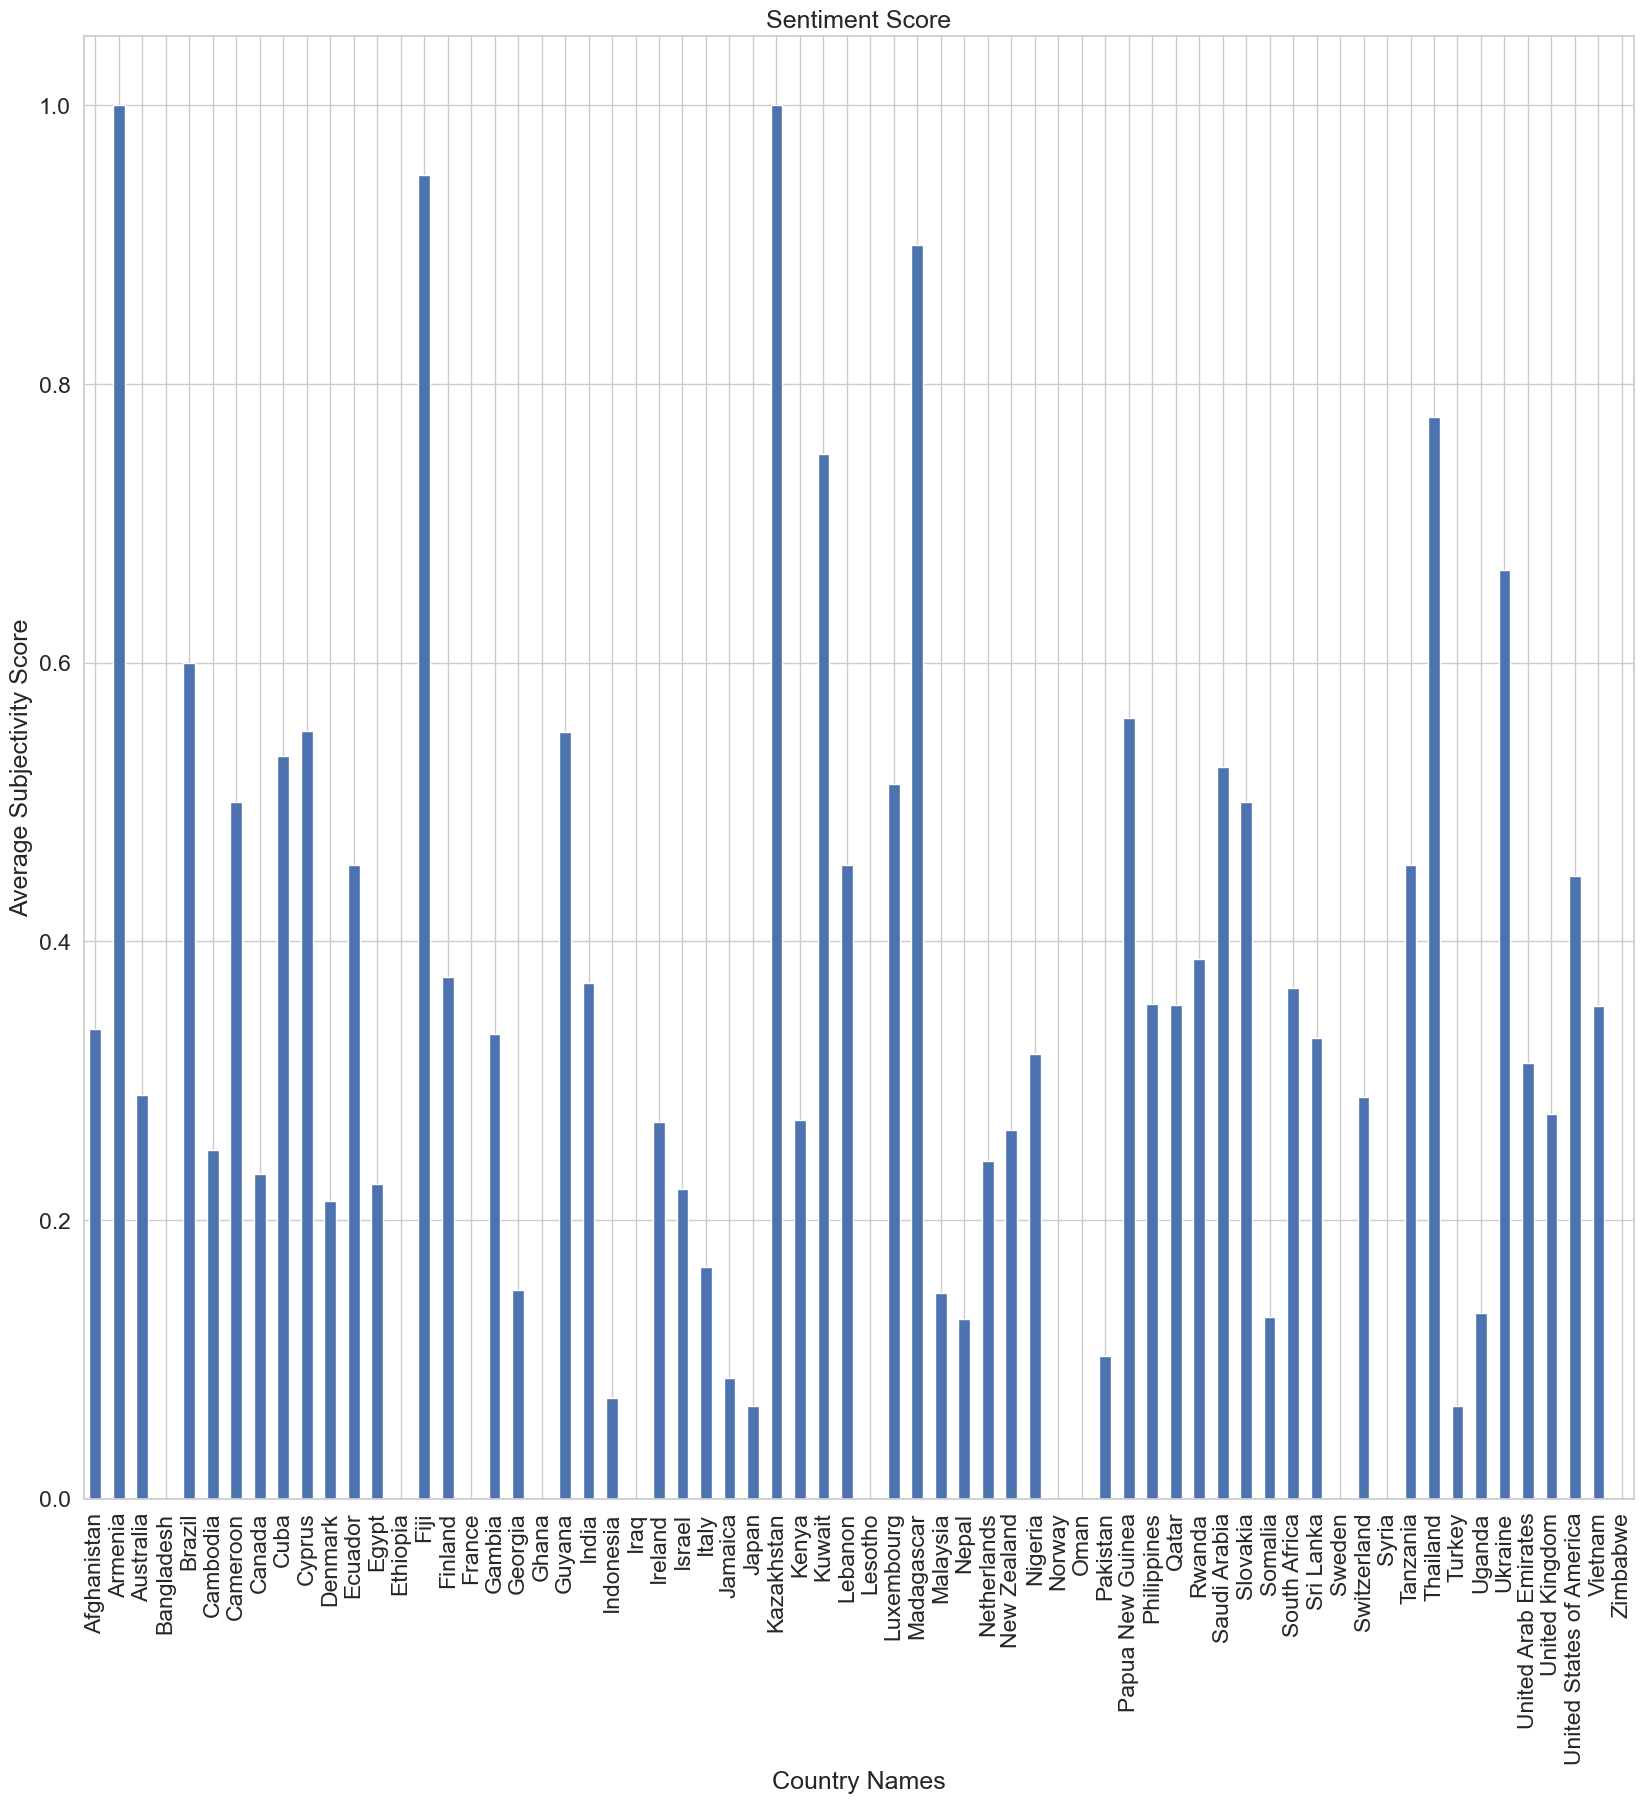

In [ ]:
df_av_subj.plot(kind='bar', title='Sentiment Score', ylabel='Average Subjectivity Score',
         xlabel='Country Names', figsize=(20, 19))

### Geospatial visualisation of the subjectivities corresponding to all the tweets.

In [ ]:

# Color scale parameter values
clrscale = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

# Create polarity geographical map figure
fig = go.Figure(data=go.Scattergeo(
    lat = df_senti['Latitude'].astype(float),
    lon = df_senti['Longitude'].astype(float),
    text = df_senti['CountryName'],
   
    #name = df_senti(str['Subjectivity']),
    marker = dict(
        color = df_senti['Subjectivity'],
        colorscale = clrscale,
        reversescale = True,
        opacity = 0.7,
        size = 7,
        colorbar = dict(
            titleside = "right",outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",showticksuffix = "last",dtick = 0.1
            
        )
        
    )
    
))



fig.show()

In [ ]:
df_corr=df_senti[['Polarity','Subjectivity']]

df_corr

,Polarity,Subjectivity
12063,0.0,0.000000
13355,0.0,0.000000
13142,0.0,0.066667
8635,0.0,0.125000
12663,0.0,0.000000
...,...,...
13003,0.0,0.000000
9425,0.0,0.000000
13195,-0.6,0.900000
5329,0.3,0.500000


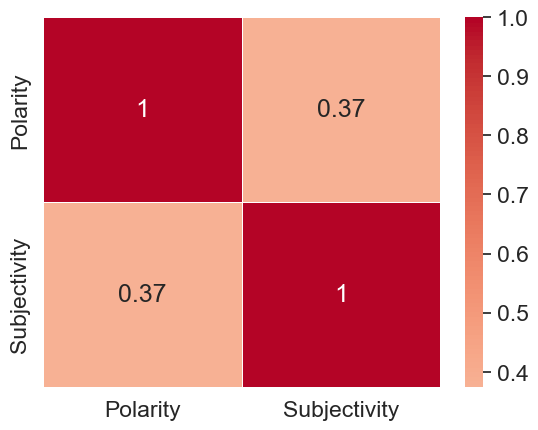

In [ ]:
ax = sns.heatmap(df_corr.corr(),center=0, linewidths=.5, annot=True, cmap="coolwarm")

Text(0.5, 0, 'Polarity')

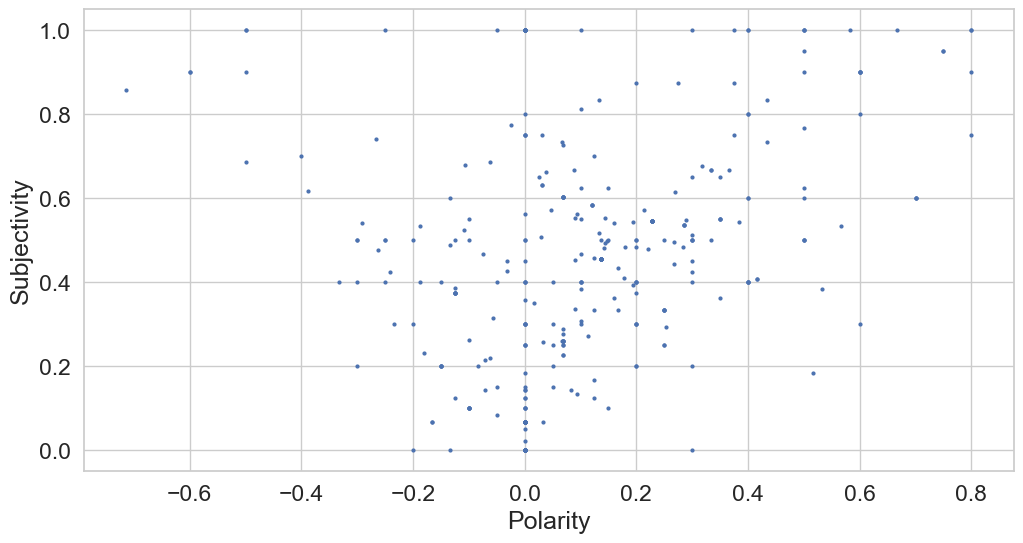

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.scatter(df_senti['Polarity'], df_senti['Subjectivity'], s=4)

plt.ylabel('Subjectivity')
plt.xlabel('Polarity')

# 